In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def f(x):
    Z = 24.44321494051954
    if abs(x) > 7:
        return 0
    elif abs(x) > 3:
        return 3 * (1 - (x / 7) ** 2) ** 0.5 / Z
    elif abs(x) > 1:
        return (
            (3 - abs(x)) / 2 - 
            3/7 * 10**0.5 * ((3 - x**2 + 2*abs(x))**0.5 - 2)
        ) / Z
    elif abs(x) > 0.75:
        return (9 - 8 * abs(x)) / Z
    elif abs(x) > 0.5:
        return (3 * abs(x) + 0.75) / Z
    else:
        return 2.25 / Z

In [18]:
def g(x): #proposal distribution
    return np.random.normal(x,2)

In [19]:
def next_step(x_t):
    y = g(x_t)
    h = min(1,f(y)/f(x_t))
    if np.random.uniform(0,1) < h:
        return y
    else:
        return x_t

In [32]:
x_0 = np.random.uniform(-7,7)
X_ts = []
sims = 300000

x_t = x_0
for i in range(sims):
    x_tplus1 = next_step(x_t)
    x_t = x_tplus1
    if (i+1)%100 == 0:
        X_ts.append(x_t)



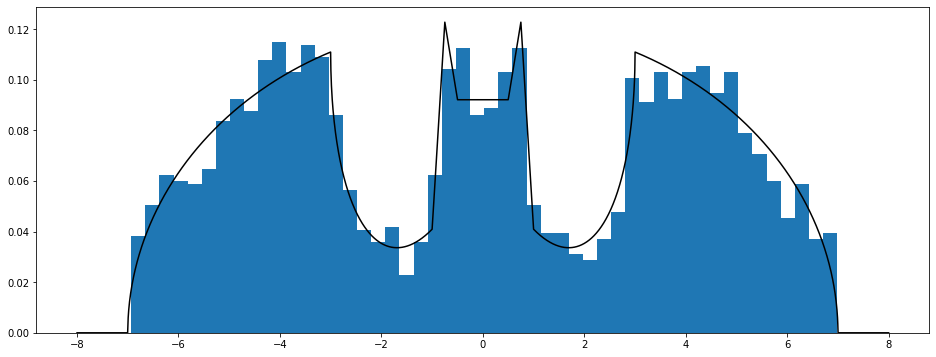

In [35]:
X = np.linspace(-8,8,sims/100)
true_dist = [f(x) for x in X]
plt.figure(figsize=(16,6))
plt.plot(X,true_dist, color = 'black')
plt.hist(X_ts, density = 1, bins=50)
plt.show()